In [79]:
!pip install pandas
!pip install numpy
!pip install matplotlib.pyplot


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data.csv")

In [16]:
df.head

<bound method NDFrame.head of     3.74540  -0.54167
0   9.50714  -0.17197
1   7.31994   0.88828
2   5.98658  -0.88854
3   1.56019   0.93404
4   1.55995   1.10707
..      ...       ...
94  4.93796  -1.21941
95  5.22733  -0.89345
96  4.27541  -0.80369
97  0.25419   0.33447
98  1.07891   1.12960

[99 rows x 2 columns]>

In [17]:
x = df.iloc[:, 0].to_numpy()

In [18]:
y = df.iloc[:, 1].to_numpy()

In [19]:
x.shape

(99,)

In [20]:
y.shape

(99,)

# Part A

choose centers

choose width

define gaussian basis function

construct the feature matrix

solve for weights

construct the final function

In [ ]:
# choose centers and width(sigma)
centers = np.array([2,5,8])
sigma = 4

<img src="graphfolder/gaussian_new_feature.png" width="400" alt="HI">

basis function formula for gaussian RBF network

In [60]:
# calculate the basis function

def rbf(x, c, sigma):
    return np.exp(- (x - c)**2 / (sigma**2))    # because x is the 1D data, we can use ()**2

In [69]:
# if x is 2D data
# def rbf(x, c, sigma):
#    diff = x - c          # shape: (n, 2)
#    norm_sq = np.sum(diff**2, axis=1)
#    return np.exp(- norm_sq / (sigma**2))

In [61]:
# usage of np.column_stack
# np.column_stack() takes that list of vectors and stacks them as columns.
a = np.array([1,2,3])
b = np.array([4,5,6])

np.column_stack([a, b])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [62]:
# usage of list
[c*2 for c in [2,5,8]]  

[4, 10, 16]

In [63]:
# [rbf(x, c, sigma) for c in centers] = [rbf(x,2,sigma),  rbf(x,5,sigma),  rbf(x,8,sigma)]
#                                     = [[a1,a2,a3],  [b1,b2,b3],  [c1,c2,c3]]

# np.column_stack() takes those separate vectors and combines them into one matrix by stacking them as columns.
# list a is the first column, list b is the second column, and list c is the third column

In [64]:
x.shape

(99,)

In [65]:
centers

array([2, 5, 8])

In [66]:
# feature matrix
Phi = np.column_stack([rbf(x, c, sigma) for c in centers])

In [67]:
Phi.shape

(99, 3)

In [68]:
# solve for weights
w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y

In [83]:
# compute the predictions
# w is the best weighs and Phi is the data in new feature map
y_pred = Phi @ w

In [ ]:
# Creates 500 new input values.
# It creates 500 evenly spaced numbers between 0 and 10.  --> x-axis
# xplot​=[0,0.02,0.04,…,10]
x_plot = np.linspace(0, 10, 500)

In [ ]:
# Computes the feature matrix for those new inputs.
# three centers indicate that you get 3 columns in ONE matrix
# the first column is from first center, and the second column is from second center and so on
Phi_plot = np.column_stack([rbf(x_plot, c, sigma) for c in centers])

In [ ]:
# Compute the prediction values for those new inputs by using best weight that I found before
H_plot = Phi_plot @ w

btw you cannot use x_plot to compute weights.

Weights must be learned from the real training data (x, y).

x_plot is only for drawing a smooth curve after training.

Train on (x, y).
Predict on x_plot.

In [ ]:
# the best weights for each basis function
w

array([ 1.77762728, -2.5204477 ,  1.71325331])

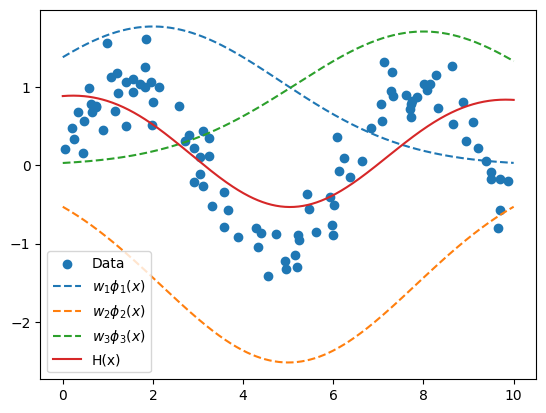

In [ ]:
# plot the training data by scatter plot
plt.scatter(x, y, label='Data')

# plot weighted basis functions
for i, c in enumerate(centers):
    plt.plot(x_plot,
             w[i] * rbf(x_plot, c, sigma),  # prediction by this basis function --> only change one part and left other bump unchanged
             linestyle='--',
             label=f'$w_{i+1} \\phi_{i+1}(x)$')

# plot final model
plt.plot(x_plot, H_plot, label='H(x)')

plt.legend()
plt.show()


# Part B